In [1]:
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import json
from datetime import datetime

In [2]:
def timestamp2date(ts):
    if(type(ts) == str):
        ts = int(ts)
    return datetime.utcfromtimestamp(ts)

def get_msg_dates_with_counts(data, sender_name):
    # Get timestamps from JSON
    timestamps = [int(msg['timestamp_ms']) for msg in data['messages'] if msg['sender_name'] == sender_name]
    
    # Get Dates from time stamps; dates are in the form of datetime objects
    dates = list(map(timestamp2date, timestamps))
    
    # Count
    date_counts = dict.fromkeys(dates, 0)
    for date in date_counts:
        date_counts.update({date: dates.count(date)})
    
    return date_counts

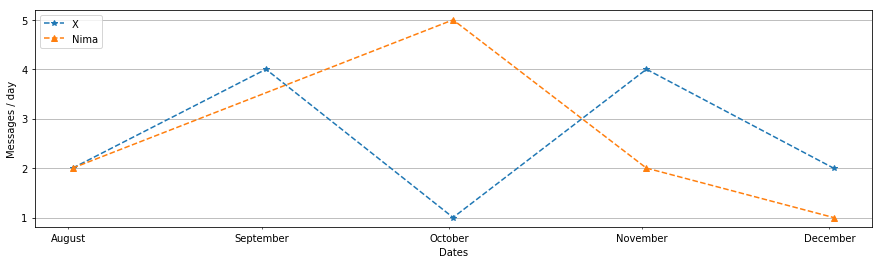

In [47]:
# Getting data from file
with open('../data/data.json') as json_file:
    data = json.load(json_file)

# Extracting the data per person
x_msgs = get_msg_dates_with_counts(data, 'x')
nima_msgs = get_msg_dates_with_counts(data, 'nima')

# Plotting
figure, ax = plt.subplots(figsize=(15,4))
x_plot, = ax.plot(x_msgs.keys(), x_msgs.values(), '*--')
nima_plot, = ax.plot(nima_msgs.keys(), nima_msgs.values(), '^--')

plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
ax.legend((x_plot, nima_plot), ('X','Nima'),loc='upper left')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

ax.grid(True)
ax.set_ylabel('Messages / day')
ax.set_xlabel('Dates')

plt.show()